In [ ]:
import pandas as pd


In [ ]:
movies_path = '/content/movies.dat'
ratings_path = '/content/ratings.dat'
users_path = '/content/users.dat'


In [ ]:
movies = pd.read_csv(movies_path, sep='::', header=None, names=['movie_id', 'title', 'genre'], engine='python', encoding='ISO-8859-1')
ratings = pd.read_csv(ratings_path, sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python', encoding='ISO-8859-1')
users = pd.read_csv(users_path, sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip'], engine='python', encoding='ISO-8859-1')

In [ ]:
# Adjust the merging process based on the actual structure of your datasets
merged_data = pd.merge(ratings, users, on='user_id')
merged_data = pd.merge(merged_data, movies, on='movie_id')


In [ ]:
# Explore the merged dataset
print(merged_data.head())

   user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0        1      1193       5  978300760      F    1          10  48067   
1        2      1193       5  978298413      M   56          16  70072   
2       12      1193       4  978220179      M   25          12  32793   
3       15      1193       4  978199279      M   25           7  22903   
4       17      1193       5  978158471      M   50           1  95350   

                                    title  genre  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama  


            user_id      movie_id        rating     timestamp           age  \
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06   
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08  2.973831e+01   
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07  1.175198e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08  1.000000e+00   
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08  2.500000e+01   
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08  2.500000e+01   
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08  3.500000e+01   
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09  5.600000e+01   

         occupation  
count  1.000209e+06  
mean   8.036138e+00  
std    6.531336e+00  
min    0.000000e+00  
25%    2.000000e+00  
50%    7.000000e+00  
75%    1.400000e+01  
max    2.000000e+01  


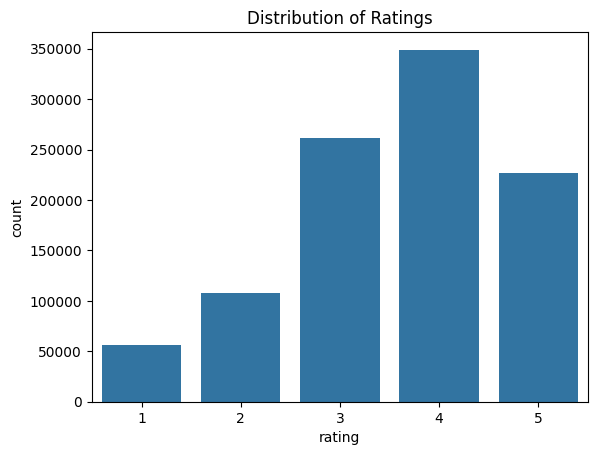

In [ ]:
# Check basic statistics of numerical columns
print(merged_data.describe())

# Explore the distribution of ratings
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rating', data=merged_data)
plt.title('Distribution of Ratings')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
features = merged_data[['user_id', 'movie_id']]
target = merged_data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.2447552857428887


Prediction

In [ ]:

new_user_id = 123
new_movie_id = 456
# Create a DataFrame with the new user and movie information
new_data = pd.DataFrame({'user_id': [new_user_id], 'movie_id': [new_movie_id]})

# Use the trained model to make predictions
predicted_rating = model.predict(new_data)

print(f'Predicted Rating for User {new_user_id} and Movie {new_movie_id}: {predicted_rating[0]}')

Predicted Rating for User 123 and Movie 456: 3.650940494764744
